# Consolidation of Best Model Results

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

### Baseline Model K-NN

In [2]:
%store -r Baseline_K_NN
Baseline_K_NN


0.785

### Decision Tree

In [3]:
%store -r DecisionTree
DecisionTree

0.641

### Random Forest

In [4]:
%store -r RandomForest
RandomForest

0.709

### Gradient Boosting

In [5]:
%store -r GradientBoosting
GradientBoosting

0.794

### SVM

#### SVC_Linear

In [6]:
%store -r SVC_Linear
SVC_Linear

0.829

#### SVC_RBF

In [7]:
%store -r SVC_RBF
SVC_RBF

0.843

### Logistic Regression

In [8]:
%store -r SGD_logreg
SGD_logreg

0.831

### Multilayer Fully Connected Network

In [9]:
%store -r Fully_Connected_Network
Fully_Connected_Network

0.825

### Multilayer Fully Connected Network, 3 hidden layers, exp. decay learning rate

In [10]:
%store -r three_hidden_decaylr_Network
three_hidden_decaylr_Network

0.831

### CNN Version 1 - 2 convolutional networks (loss: Mean cross entropy)

In [11]:
%store -r CNN_1_2convlyr
CNN_1_2convlyr

0.792

### CNN Version 2 - 2 convolutional networks (Version 1 + L2 regularization)

In [12]:
%store -r CNN_2_2convlyr_L2
CNN_2_2convlyr_L2

0.802

## Bar chart to visualize results

In [13]:
# Create a dataset
models=[Baseline_K_NN, DecisionTree, RandomForest, GradientBoosting, SVC_Linear, SVC_RBF, SGD_logreg,Fully_Connected_Network, three_hidden_decaylr_Network, CNN_1_2convlyr,CNN_2_2convlyr_L2]

In [14]:
models

[0.785, 0.641, 0.709, 0.794, 0.829, 0.843, 0.831, 0.825, 0.831, 0.792, 0.802]

In [15]:
# Names of the models
model_names=['Baseline_K_NN', 'DecisionTree', 'RandomForest', 'GradientBoosting', 'SVC_Linear', 'SVC_RBF', 'SGD_logreg', 'Fully_Connected_Network', 'three_hidden_decaylr_Network', 'CNN_1_2convlyr', 'CNN_2_2convlyr_L2']

In [16]:
# Create the x position of the bars
x_pos = list(range(len(model_names)))

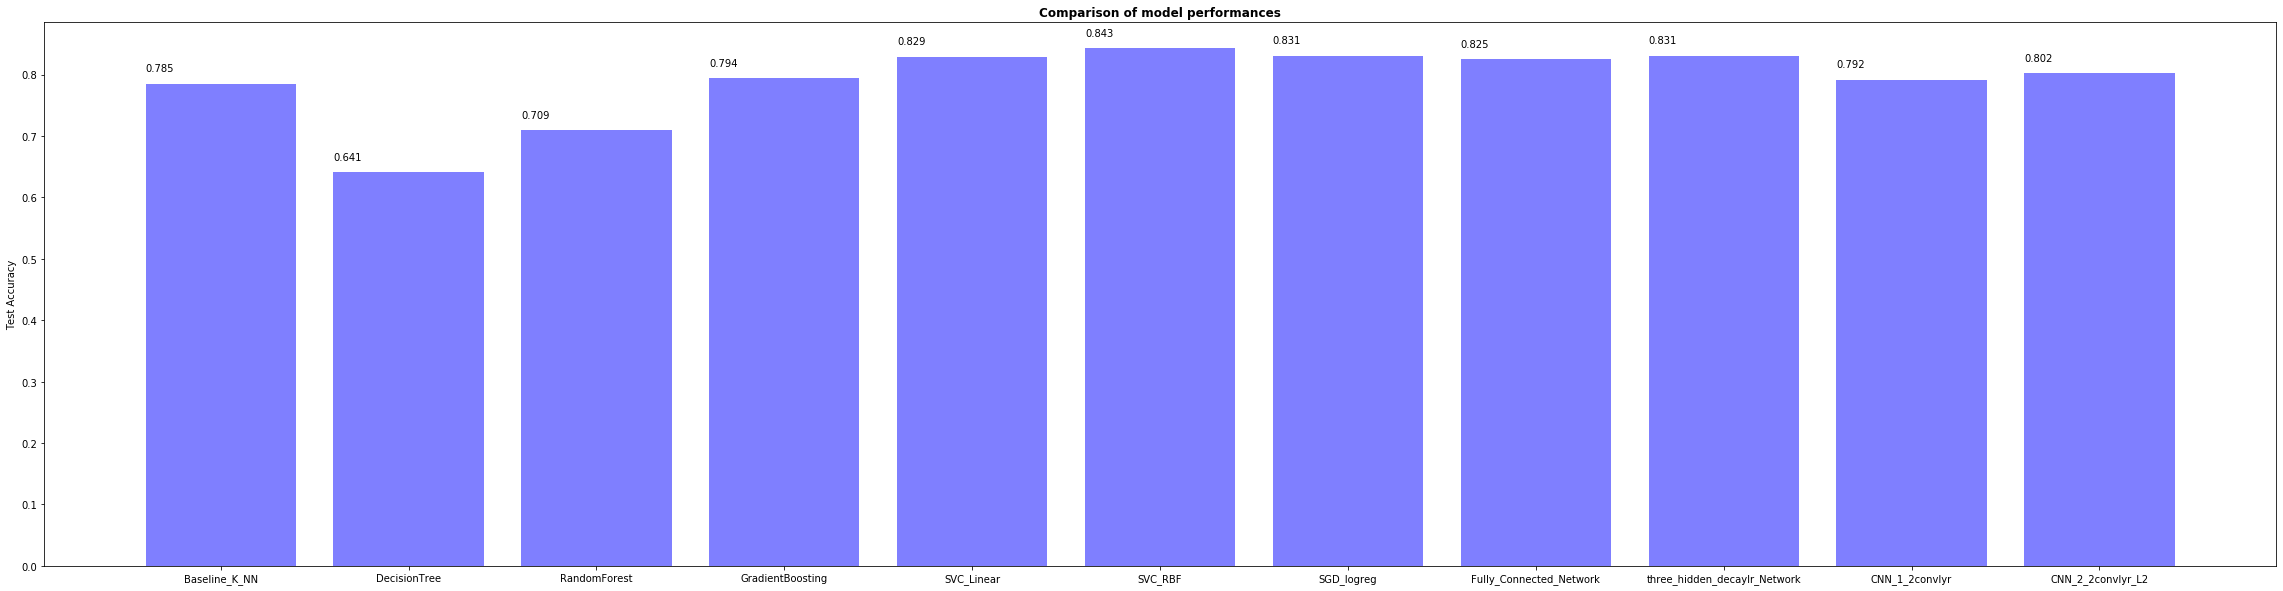

In [18]:
# Create the plot bars
barchart = plt.bar(x_pos, models, align='center', color='b', alpha=0.5)

# set axes labels and title
plt.ylabel('Test Accuracy')
plt.xticks(x_pos,model_names)
plt.title('Comparison of model performances', fontweight="bold")


for barchart in barchart:
    yval = barchart.get_height()
    plt.text(barchart.get_x(), yval + .02, yval)
    
# set the size of the chart
plt.rcParams["figure.figsize"]=[40,10]

plt.show()


## Selection of the final model for submission

## Summary of the analysis
>
> **Criteria**
* Accuracy on Test dataset (from the original train dataset)
* Level of overfitting (based on the difference of accuracy between Train and Validation dataset)
* Overall considerations about the ability of the model to generalize. We will consider the accuracy gap between train and validation

> **Analysis**
* 3 models can be selected based on their accuracy on test data (from cifar4.train data set): SVC_RBF (0.843); SGD_Logreg (0.83) and NeuralNet three_hidden_decaylr (0.830). The best CNN is CNN_2_2convlyr_L2 (0.802)
* Accuracy of models on train data set indicates a high level of overfitting for SVC_RBF (Train: 0.976), less for SGD_Logreg (Train: 0.899)
* Accuracy on validation/train for neuralnet and CNN is (average of last 3 epoch): Multilayer 3 Fully Connected layers (Tree_Hidden neuralnet: validation: 0.832; Train: 0.87); CNN_2 (Validation:0.773 ; Train: 0.86)

> **Selection**
* **The model selected for submission is: Multilayer 3 Fully Connected Layer with Exponential Decay Learning rate and L2 regularization**
* The available litterature and model performance on different specialized sites indicate complex CNN as best performer on CIFAR10 with at least 10,000 of images to be trained. I assume that the small size of dataset and the fact we have 4 categories to classify (instead of 10) makes a simple network more efficient than a complex CNN
* A complementary explanation is that the quality of extracted features in the CIFAR4 overfeat data set is better than the one generated by my CNN models (from pixel data set)